In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
d1 = pd.read_csv('MoneyControl-First-1-10-Pages.csv')
d2 = pd.read_csv('MoneyControl-First-11-20-Pages.csv')
d3 = pd.read_csv('MoneyControl-First-1-10-Pages-New.csv')

In [105]:
d4 = pd.concat([d1,d2,d3])

E:\Anaconda\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
d4.shape

(651, 9)

In [6]:
sum(d4.Label)/len(d4)

0.2995391705069124

In [11]:
labels = []
for i in d4.Label:
    if i == 2:
        labels.append('V Pos')
    elif i==1:
        labels.append('Pos')
    elif i == 0:
        labels.append('Neu')
    elif i==-1:
        labels.append('Neg')
    elif i==-2:
        labels.append('V Neg')

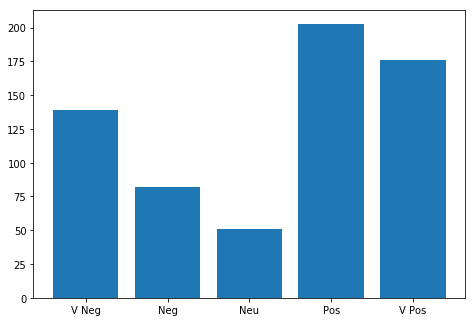

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sentiments = ['V Neg', 'Neg', 'Neu', 'Pos', 'V Pos']
counts = [len(d4.Label[d4.Label == -2]),len(d4.Label[d4.Label == -1]),len(d4.Label[d4.Label == 0]),len(d4.Label[d4.Label == 1]),len(d4.Label[d4.Label == 2])]
ax.bar(Sentiments,counts)
plt.show()

In [42]:
d4.index[d4.Label == 2]
d4.iloc[182].title

"L&T share price gains 3% after Credit Suisse upgrades stock to 'outperform'"

In [27]:
counts = [len(d4.Label[d4.Label == -2]),len(d4.Label[d4.Label == -1]),len(d4.Label[d4.Label == 0]),len(d4.Label[d4.Label == 1]),len(d4.Label[d4.Label == 2])]
counts

[139, 82, 51, 203, 176]

In [44]:
len(d4.Label[d4.Label < 0])

221

In [47]:
379/(379+221)

0.6316666666666667

In [79]:
d4.Label.value_counts()

 1    203
 2    176
-2    139
-1     82
 0     51
Name: Label, dtype: int64

In [81]:
d4.title = d4.title.str.lower()
d4.title

0      max financial gains 5% on max life extending i...
1      looking to invest in us market? subscription f...
2      timing the market is not possible, but investo...
3      zee entertainment share price plunges 14%, loo...
4      bandhan bank share price slips 10% despite str...
5      cadila healthcare shares rise 2% on usfda nod ...
6      this radhakishan damani-owned stock might be d...
7      ‘allocate 30%-40% of investable corpus now at ...
8      indoco remedies surges 16% as it ships paracet...
9      gpt infraprojects jumps 20% on road-widening o...
10                    polyplex corp share price falls 5%
11     d-street buzz: 300 stocks hit lower circuit on...
12     slideshow | winners & losers: 10 stocks that m...
13     d-street talk podcast | these 7 ‘phoenix' stoc...
14     lupin share price gains 8% after nagpur unit r...
15     ig petrochemicals share locked in upper circui...
16     l&t share price jumps 5% on order wins for wat...
17     gaja capital infuses rs 

In [86]:
d4.iloc[0].title

'max financial gains 5% on max life extending insurance partnership with yes bank'

In [122]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english")) 
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
def preprocessor(line):
    line = line.lower()
    line = line.split()
    #print(line)
    line = [stemming.stem(i) for i in line]
    #print(line)
    line = [i for i in line if not i in stops]
    #print(line)
    return ' '.join(line)
d4.title = [preprocessor(i) for i in d4.summary]

In [123]:
df = d4
d4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 193
Data columns (total 9 columns):
Label           651 non-null int64
Unnamed: 0      238 non-null float64
article_text    651 non-null object
author          606 non-null object
description     642 non-null object
summary         651 non-null object
time            651 non-null object
title           651 non-null object
url             651 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 50.9+ KB


In [57]:
def simplifier(l):
    if l < 0:
        return -1
    elif l > 0:
        return 1
    else:
        return 0
df.Label = [simplifier(i) for i in df.Label]

In [124]:
from sklearn.model_selection import train_test_split

X = df['summary']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [126]:
text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 5  0  0 32 10]
 [ 0  0  0 26  7]
 [ 0  0  1 17  3]
 [ 0  0  0 45 15]
 [ 0  0  0 28 26]]
              precision    recall  f1-score   support

          -2       1.00      0.11      0.19        47
          -1       0.00      0.00      0.00        33
           0       1.00      0.05      0.09        21
           1       0.30      0.75      0.43        60
           2       0.43      0.48      0.45        54

   micro avg       0.36      0.36      0.36       215
   macro avg       0.55      0.28      0.23       215
weighted avg       0.51      0.36      0.29       215

0.3581395348837209


E:\Anaconda\envs\nlp_course\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [129]:
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[20  5  2 15  5]
 [10  2  1 10 10]
 [ 5  0  4  7  5]
 [ 6  1  1 30 22]
 [ 4  2  0 17 31]]
              precision    recall  f1-score   support

          -2       0.44      0.43      0.43        47
          -1       0.20      0.06      0.09        33
           0       0.50      0.19      0.28        21
           1       0.38      0.50      0.43        60
           2       0.42      0.57      0.49        54

   micro avg       0.40      0.40      0.40       215
   macro avg       0.39      0.35      0.34       215
weighted avg       0.39      0.40      0.38       215

0.4046511627906977


In [184]:
df['3_Labels'] = [simplifier(i) for i in df.Label]

In [185]:
df_POSNEG = df[df['3_Labels'] != 0]

In [133]:
df_POSNEG

,Label,Unnamed: 0,article_text,author,description,summary,time,title,url,3_Labels
0,1,0.0,max financi servic share price ralli 4.7 perce...,Sunil Matkar,Max Life-Yes Bank relationship has over the ye...,max financi servic share price ralli 4.7 perce...,"April 13, 2020 12:04 PM IST",max financi gain 5% max life extend insur part...,https://www.moneycontrol.com/news/business/mar...,1
3,-2,3.0,zee entertain share price plung 14 percent int...,Nishant Kumar,The company will extend financial and operatio...,zee entertain share price plung 14 percent int...,"April 13, 2020 02:34 PM IST","zee entertain share price plung 14%, look cour...",https://www.moneycontrol.com/news/business/mar...,-1
4,-1,4.0,bandhan bank share price fell nearli 10 percen...,Sunil Matkar,The capital adequacy ratio of the bank at the ...,bandhan bank share price fell nearli 10 percen...,"April 13, 2020 11:45 AM IST",bandhan bank share price slip 10% despit stron...,https://www.moneycontrol.com/news/business/mar...,-1
5,1,5.0,share price cadila healthcar wa 2 percent intr...,Sandip Das,Zydus Cadila has received tentative approval f...,share price cadila healthcar wa 2 percent intr...,"April 13, 2020 12:07 PM IST",cadila healthcar share rise 2% usfda nod marke...,https://www.moneycontrol.com/news/business/sto...,1
8,2,8.0,share indoco remedi ralli nearli 16 percent in...,Sunil Matkar,The permission granted by the Indian Governmen...,share indoco remedi ralli nearli 16 percent in...,"April 13, 2020 01:33 PM IST",indoco remedi surg 16% ship paracetamol tablet UK,https://www.moneycontrol.com/news/business/mar...,1


In [138]:
from sklearn.model_selection import train_test_split
X = df_POSNEG['summary']
y = df_POSNEG['3_Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 2 21]
 [ 0 37]]
              precision    recall  f1-score   support

          -1       1.00      0.09      0.16        23
           1       0.64      1.00      0.78        37

   micro avg       0.65      0.65      0.65        60
   macro avg       0.82      0.54      0.47        60
weighted avg       0.78      0.65      0.54        60

0.65


In [158]:
from sklearn.model_selection import train_test_split
X = df_POSNEG['summary']
y = df_POSNEG['3_Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 0  0  0  0]
 [ 7  0 15  5]
 [ 1  0 21 11]
 [ 0  0  0  0]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00        27
           1       0.58      0.64      0.61        33
           2       0.00      0.00      0.00         0

   micro avg       0.35      0.35      0.35        60
   macro avg       0.15      0.16      0.15        60
weighted avg       0.32      0.35      0.33        60

0.35


In [140]:
from sklearn.model_selection import train_test_split
X = df_POSNEG['title']
y = df_POSNEG['3_Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 8 16]
 [ 2 34]]
              precision    recall  f1-score   support

          -1       0.80      0.33      0.47        24
           1       0.68      0.94      0.79        36

   micro avg       0.70      0.70      0.70        60
   macro avg       0.74      0.64      0.63        60
weighted avg       0.73      0.70      0.66        60

0.7


In [141]:
from sklearn.model_selection import train_test_split
X = df_POSNEG['title']
y = df_POSNEG['3_Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[18  5]
 [ 0 37]]
              precision    recall  f1-score   support

          -1       1.00      0.78      0.88        23
           1       0.88      1.00      0.94        37

   micro avg       0.92      0.92      0.92        60
   macro avg       0.94      0.89      0.91        60
weighted avg       0.93      0.92      0.91        60

0.9166666666666666


In [142]:
from sklearn.model_selection import train_test_split
X = df_POSNEG['article_text']
y = df_POSNEG['3_Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 1 17]
 [ 0 42]]
              precision    recall  f1-score   support

          -1       1.00      0.06      0.11        18
           1       0.71      1.00      0.83        42

   micro avg       0.72      0.72      0.72        60
   macro avg       0.86      0.53      0.47        60
weighted avg       0.80      0.72      0.61        60

0.7166666666666667


In [143]:
from sklearn.model_selection import train_test_split
X = df_POSNEG['article_text']
y = df_POSNEG['3_Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 1 23]
 [ 0 36]]
              precision    recall  f1-score   support

          -1       1.00      0.04      0.08        24
           1       0.61      1.00      0.76        36

   micro avg       0.62      0.62      0.62        60
   macro avg       0.81      0.52      0.42        60
weighted avg       0.77      0.62      0.49        60

0.6166666666666667


In [148]:
from sklearn.model_selection import train_test_split
X = df['title']
y = df['3_Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[10  0  9]
 [ 1  0  5]
 [ 0  0 41]]
              precision    recall  f1-score   support

          -1       0.91      0.53      0.67        19
           0       0.00      0.00      0.00         6
           1       0.75      1.00      0.85        41

   micro avg       0.77      0.77      0.77        66
   macro avg       0.55      0.51      0.51        66
weighted avg       0.72      0.77      0.72        66

0.7727272727272727


E:\Anaconda\envs\nlp_course\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [151]:
from sklearn.model_selection import train_test_split
X = df['summary']
y = df['3_Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 1  0 19]
 [ 0  0  5]
 [ 0  0 41]]
              precision    recall  f1-score   support

          -1       1.00      0.05      0.10        20
           0       0.00      0.00      0.00         5
           1       0.63      1.00      0.77        41

   micro avg       0.64      0.64      0.64        66
   macro avg       0.54      0.35      0.29        66
weighted avg       0.69      0.64      0.51        66

0.6363636363636364


E:\Anaconda\envs\nlp_course\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [152]:
from sklearn.model_selection import train_test_split
X = df['article_text']
y = df['3_Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 1  0 18]
 [ 0  0  5]
 [ 0  0 42]]
              precision    recall  f1-score   support

          -1       1.00      0.05      0.10        19
           0       0.00      0.00      0.00         5
           1       0.65      1.00      0.79        42

   micro avg       0.65      0.65      0.65        66
   macro avg       0.55      0.35      0.30        66
weighted avg       0.70      0.65      0.53        66

0.6515151515151515


E:\Anaconda\envs\nlp_course\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [156]:
from sklearn.model_selection import train_test_split
X = df['article_text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 0  0  0 14  2]
 [ 0  0  0  6  1]
 [ 0  0  0  4  2]
 [ 0  0  0 13  7]
 [ 1  0  0  8  8]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        16
          -1       0.00      0.00      0.00         7
           0       0.00      0.00      0.00         6
           1       0.29      0.65      0.40        20
           2       0.40      0.47      0.43        17

   micro avg       0.32      0.32      0.32        66
   macro avg       0.14      0.22      0.17        66
weighted avg       0.19      0.32      0.23        66

0.3181818181818182


E:\Anaconda\envs\nlp_course\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [174]:
from sklearn.model_selection import train_test_split
X = df['article_text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[ 4  0  0  3  3]
 [ 6  2  0  4  0]
 [ 1  0  1  1  1]
 [ 5  0  0 10  4]
 [ 1  0  0  7 13]]
              precision    recall  f1-score   support

          -2       0.24      0.40      0.30        10
          -1       1.00      0.17      0.29        12
           0       1.00      0.25      0.40         4
           1       0.40      0.53      0.45        19
           2       0.62      0.62      0.62        21

   micro avg       0.45      0.45      0.45        66
   macro avg       0.65      0.39      0.41        66
weighted avg       0.59      0.45      0.45        66

0.45454545454545453


In [175]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

E:\Anaconda\envs\nlp_course\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [192]:
df_POSNEG['scores'] = df_POSNEG['article_text'].apply(lambda review: sid.polarity_scores(review))
df_POSNEG['compound']  = df_POSNEG['scores'].apply(lambda score_dict: score_dict['compound'])
df_POSNEG['comp_score'] = df_POSNEG['compound'].apply(lambda c: 1 if c >=0 else -1)

E:\Anaconda\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [193]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(df_POSNEG['3_Labels'],df_POSNEG['comp_score']))
# Print a classification report
print(metrics.classification_report(df_POSNEG['3_Labels'],df_POSNEG['comp_score']))
# Print the overall accuracy
print(metrics.accuracy_score(df_POSNEG['3_Labels'],df_POSNEG['comp_score']))

[[ 39 182]
 [ 21 358]]
              precision    recall  f1-score   support

          -1       0.65      0.18      0.28       221
           1       0.66      0.94      0.78       379

   micro avg       0.66      0.66      0.66       600
   macro avg       0.66      0.56      0.53       600
weighted avg       0.66      0.66      0.59       600

0.6616666666666666


In [195]:
df['compound']

0      0.6249
1      0.0000
2      0.0000
3      0.8074
4      0.7964
5      0.2960
6      0.0000
7      0.0000
8      0.0000
9      0.0000
10     0.2960
11    -0.2960
12     0.1027
13     0.0000
14     0.6808
15     0.2960
16     0.7184
17     0.0000
18    -0.2960
19     0.2960
20     0.0000
21     0.0000
22    -0.6597
23     0.6249
24     0.5574
25     0.0000
26     0.0000
27     0.0000
28     0.4404
29     0.0000
        ...  
164    0.0000
165    0.0000
166   -0.6486
167    0.4404
168    0.7184
169    0.0000
170   -0.2732
171    0.0000
172    0.2960
173    0.0000
174    0.4939
175    0.2500
176   -0.0772
177    0.4939
178    0.2960
179    0.2960
180    0.2960
181    0.0000
182    0.0000
183    0.0000
184   -0.3182
185    0.2960
186    0.0000
187    0.2263
188    0.0258
189    0.2960
190    0.0000
191    0.5267
192    0.4939
193    0.0000
Name: compound, Length: 651, dtype: float64

In [196]:
def vader_simplifier(l):
    if l >= -1 and l <= -0.5:
        return -2
    elif l > -0.5 and l < 0:
        return -1
    elif l == 0:
        return 0
    elif l > 0 and l <= 0.5:
        return 1
    elif l > 0.5 and l <= 1:
        return 2
    
l = [-0.89, -0.22, 0, 0.11, 0.88]
l = [vader_simplifier(i) for i in l]
l

[-2, -1, 0, 1, 2]

In [197]:
df['vader_comm'] = [vader_simplifier(i) for i in df['compound']]

In [199]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(df['Label'],df['vader_comm']))
# Print a classification report
print(metrics.classification_report(df['Label'],df['vader_comm']))
# Print the overall accuracy
print(metrics.accuracy_score(df['Label'],df['vader_comm']))

[[16 40 45 28 10]
 [ 5 17 23 31  6]
 [ 3  5 17 23  3]
 [ 5 11 77 75 35]
 [ 1 13 85 57 20]]
              precision    recall  f1-score   support

          -2       0.53      0.12      0.19       139
          -1       0.20      0.21      0.20        82
           0       0.07      0.33      0.11        51
           1       0.35      0.37      0.36       203
           2       0.27      0.11      0.16       176

   micro avg       0.22      0.22      0.22       651
   macro avg       0.28      0.23      0.21       651
weighted avg       0.33      0.22      0.23       651

0.2227342549923195
